<a href="https://colab.research.google.com/github/team0243/multivariate/blob/main/Chapter_4_MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multidimension Scaling คือ การลดขนาดของตัวเเปร จากที่มีเยอะให้เหลือน้อยๆ

## Example on Iris dataset

In [1]:
import pandas as pd

In [2]:
example_df = pd.read_csv(
    'https://raw.github.com/pandas-dev/'
    'pandas/master/pandas/tests/io/data/csv/iris.csv'
)
example_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**ลอง plot PCA เพื่อเปรียบเทียบกับ วิธี MDS**

In [3]:
from sklearn.decomposition import PCA

In [4]:
pca = PCA(n_components=2) # เอาเเค่สองเเกนหลัก

In [6]:
new_pca = pca.fit_transform(example_df.iloc[:,:-1])

In [7]:
from matplotlib import pyplot as plt

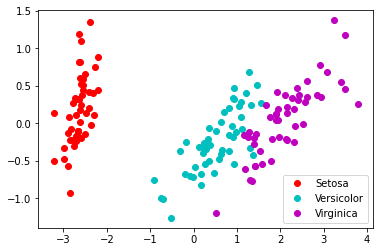

In [13]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or',label='Setosa')  # พร็อตเเบ่งสามพันธุ์
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'oc',label='Versicolor') 
plt.plot(new_pca[100:,0],new_pca[100:,1],'om',label='Virginica')
plt.legend()

## MDS(Multidimensional Scaling)

Distance คือ ระยะห่างระหว่างจุด

In [16]:
X1 = example_df.iloc[0,:-1].to_numpy() # เอาตั้งเเต่จุดที่หนึ่งยกเว้นชื่อมัน
X1

array([5.1, 3.5, 1.4, 0.2], dtype=object)

In [15]:
X2 = example_df.iloc[1,:-1].to_numpy() # เอาตั้งเเต่จุดที่ 2 ยกเว้นชื่อมัน
X2

array([4.9, 3.0, 1.4, 0.2], dtype=object)

In [17]:
import numpy as np

In [18]:
dist = np.linalg.norm(X1-X2) # ระยะห่างระหว่างจุดที่ 1 กับ 2
dist

0.5385164807134502

In [19]:
(0.04 + 0.25)**(0.5) # sqrt การยกกำลัง 0.5

0.5385164807134504

## Distance Matrix คือ เเสดงถึงระยะห่างของเเต่ละจุด

In [ ]:
from sklearn.metrics import pairwise_distances
dis_matrix = pairwise_distances(example_df.iloc[:,:-1])
dis_matrix
# 0.53851648 ระยะห่างระหว่างจุด 1 กับ จุด 2

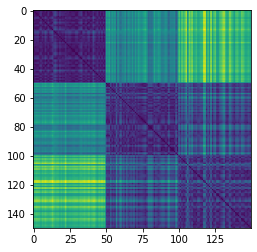

In [21]:
plt.imshow(dis_matrix) # เเต่ละจุดในmatrix มาพร็อตเป็นสี ยิ่งค่ามาก สีสว่าง ยิ่งค่าน้อย(พันธุ์เดียวกัน) สีเข้ม

#ทำ MDS

In [22]:
from sklearn.manifold import MDS # อยู่ในโฟลเดอร์ย่อย

In [23]:
mds = MDS(n_components=2)

In [24]:
new_mds = mds.fit_transform(example_df.iloc[:,:-1])

In [ ]:
new_mds

**สนใจว่าจุดไหนห่างจากจุดไหนมากที่สุด**

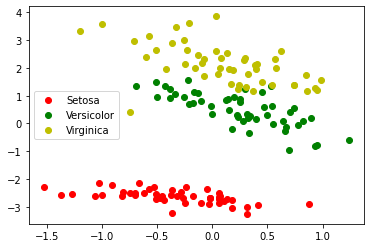

In [26]:
plt.plot(new_mds[:50,0],new_mds[:50,1],'or',label='Setosa')  # พร็อตเเบ่งสามพันธุ์
plt.plot(new_mds[50:100,0],new_mds[50:100,1],'og',label='Versicolor') 
plt.plot(new_mds[100:,0],new_mds[100:,1],'oy',label='Virginica')
plt.legend()

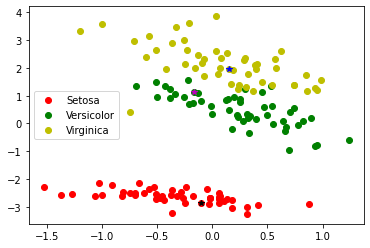

In [27]:
plt.plot(new_mds[:50,0],new_mds[:50,1],'or',label='Setosa')  # พร็อตเเบ่งสามพันธุ์
plt.plot(new_mds[50:100,0],new_mds[50:100,1],'og',label='Versicolor') 
plt.plot(new_mds[100:,0],new_mds[100:,1],'oy',label='Virginica')
plt.plot(new_mds[6,0],new_mds[6,1],'*k') # สุ่มจุด
plt.plot(new_mds[56,0],new_mds[56,1],'*m')  # m คือ สีม่วง
plt.plot(new_mds[116,0],new_mds[116,1],'*b')
plt.legend()  

## การใช้ Pre-computed Distance Matrix

In [28]:
dis_matrix = pairwise_distances(example_df.iloc[:,:-1],metric = 'cityblock') ## 'cityblock'

In [29]:
mds2 = MDS(n_components=2,dissimilarity ='precomputed')

In [30]:
new_mds2 = mds.fit_transform(dis_matrix)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


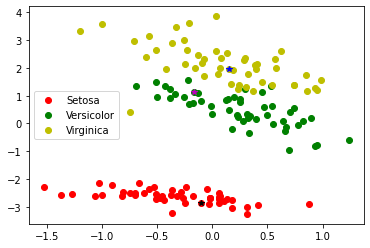

In [31]:
plt.plot(new_mds[:50,0],new_mds[:50,1],'or',label='Setosa')  # พร็อตเเบ่งสามพันธุ์
plt.plot(new_mds[50:100,0],new_mds[50:100,1],'og',label='Versicolor') 
plt.plot(new_mds[100:,0],new_mds[100:,1],'oy',label='Virginica')
plt.plot(new_mds[6,0],new_mds[6,1],'*k') # สุ่มจุด
plt.plot(new_mds[56,0],new_mds[56,1],'*m')  # m คือ สีม่วง
plt.plot(new_mds[116,0],new_mds[116,1],'*b')
plt.legend() 